In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
477,-1.295497,-0.492351,1.384553
296,-0.871222,-0.804310,0.956380
515,-1.426970,0.168558,-0.492081
90,-0.545122,-1.428228,0.866902
539,0.112245,-0.496050,-0.611585
...,...,...,...
351,1.282875,0.750553,-0.059104
123,-0.069177,-0.537973,0.883717
482,0.260367,1.227739,-0.352760
239,0.916012,-0.459059,0.541419


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
308,-1.212249,-1.428228,-0.916051
432,0.308594,-0.390009,-0.781533
513,1.207091,0.095809,0.458547
440,-1.510217,-1.648942,-2.162736
44,0.547427,-0.460292,0.125256
...,...,...,...
229,0.166786,-1.150794,-0.602578
266,0.497479,0.986064,0.200322
172,-0.808069,0.667939,1.921421
100,1.093989,1.791239,0.223142


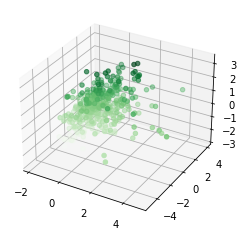

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
477,-0.492351,-1.295497
296,-0.804310,-0.871222
515,0.168558,-1.426970
90,-1.428228,-0.545122
539,-0.496050,0.112245
...,...,...
351,0.750553,1.282875
123,-0.537973,-0.069177
482,1.227739,0.260367
239,-0.459059,0.916012


In [10]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
477,1.384553
296,0.956380
515,-0.492081
90,0.866902
539,-0.611585
...,...
351,-0.059104
123,0.883717
482,-0.352760
239,0.541419


In [11]:
sc=StandardScaler()
X_transform=sc.fit_transform(dataF)
lin_reg = LinearRegression()
lin_reg.fit(X_transform, targetF)
lin_reg.intercept_, lin_reg.coef_

(array([-0.00297185]), array([[0.22581439, 0.47636627]]))

In [12]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
-0.49235092512611894


In [13]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
308,-1.428228,-1.212249
432,-0.390009,0.308594
513,0.095809,1.207091
440,-1.648942,-1.510217
44,-0.460292,0.547427
...,...,...
229,-1.150794,0.166786
266,0.986064,0.497479
172,0.667939,-0.808069
100,1.791239,1.093989


In [14]:
testY

,quantitative response of LC50
308,-0.916051
432,-0.781533
513,0.458547
440,-2.162736
44,0.125256
...,...
229,-0.602578
266,0.200322
172,1.921421
100,0.223142


In [15]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
-1.4282280185877068


In [16]:
iters = 1500
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

w0 = -2.9718493848356322e-05


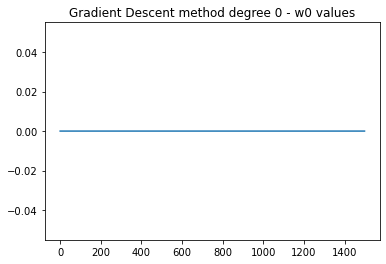

In [17]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.mean(valY)-w)
    #print(w1,w)
    if w1-w <= 10**(-20):
        w=w1
        break
    counter+=1
    costArr[counter] = (np.mean(valY)-w)
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.title("Gradient Descent method degree 0 - w0 values")
plt.show() 

In [18]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.0313195929058778

In [19]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8667696179568938

w0=1.3845527544630838
w1=0.019307416850305584
w2=0.009567890341539006


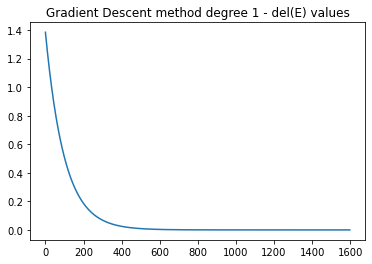

In [20]:
# Degree 1 here
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 1 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [21]:
# training data error for degree 1
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

2.932854199037808

In [22]:
# testing data error for degree 1
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

2.7223955040364096

w0=1.3845527544630838
w1=0.019307416850305584
w2=0.009567890341539006
w3=0.156116842361609
w4=-0.07869599198783263
w5=-0.0009331316920328831


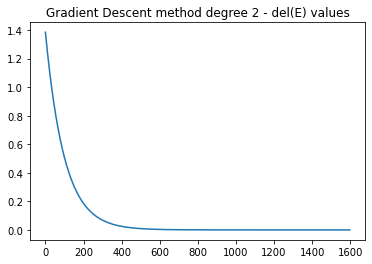

In [23]:
# Degree 2 here
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 2 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [24]:
# training data error for degree 2
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

3.5055660349623006

In [25]:
# testing data error for degree 2
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

3.0150526720673025

w0=1.3845527544630838
w1=0.019307416850305584
w2=0.009567890341539006
w3=0.156116842361609
w4=-0.07869599198783263
w5=-0.0009331316920328831
w6=-0.01713516448235983
w7=0.010390974384557366
w8=-0.008991386001653723
w9=-0.0012230762040701837


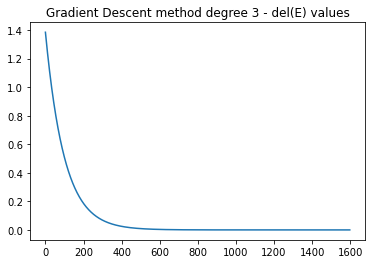

In [26]:
# Degree 3 here
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 3 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [27]:
# training data error for degree 3
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

3.348408878131609

In [28]:
# testing data error for degree 3
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

3.038834045846857

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458


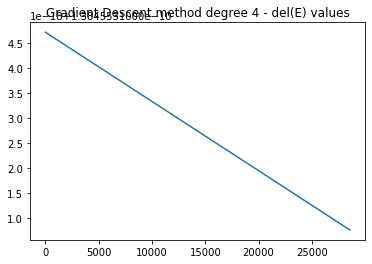

In [29]:
# Degree 4 here
learningRate = 0.01
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 4 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [30]:
# training data error for degree 4
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.0313196374984352

In [31]:
# testing data error for degree 4
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8667690796334041

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458
w15=394.6032010685382
w16=-303.139655727651
w17=-717.5821726524342
w18=-444.5456385891232
w19=392.12525125909514
w20=-1956.460253172966


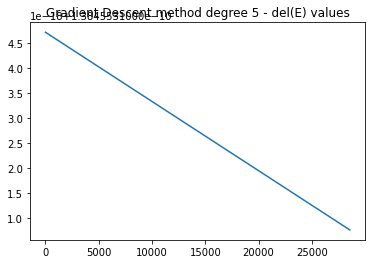

In [32]:
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 5 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [33]:
# training data error for degree 5
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.0313269000375351

In [34]:
# testing data error for degree 5
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8667705551061681

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458
w15=394.6032010685382
w16=-303.139655727651
w17=-717.5821726524342
w18=-444.5456385891232
w19=392.12525125909514
w20=-1956.460253172966
w21=-1241.6970934101266
w22=1205.7216309059236
w23=-10967.871587210991
w24=-92.7023196848948
w25=-3991.13505045954
w26=-11077.24086815169
w27=-3275.587889327017


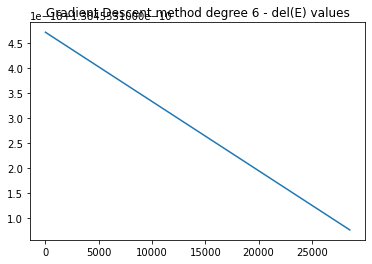

In [35]:
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 6 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [36]:
# training data error for degree 6
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.031372615436754

In [37]:
# testing data error for degree 6
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8667757150676699

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458
w15=394.6032010685382
w16=-303.139655727651
w17=-717.5821726524342
w18=-444.5456385891232
w19=392.12525125909514
w20=-1956.460253172966
w21=-1241.6970934101266
w22=1205.7216309059236
w23=-10967.871587210991
w24=-92.7023196848948
w25=-3991.13505045954
w26=-11077.24086815169
w27=-3275.587889327017
w28=-98027.41549363152
w29=-797.4855696495719
w30=-9396.78180376471
w31=3258.0228513469533
w32=-32054.927375754593
w33=10578.006594317336
w34=4509.181546104155
w35=-23436.980675983123


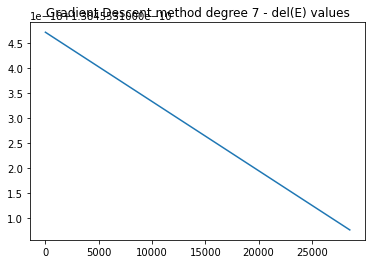

In [38]:
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 7 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [39]:
# training data error for degree 7
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.0339091977965924

In [40]:
# testing data error for degree 7
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8669670316638736

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458
w15=394.6032010685382
w16=-303.139655727651
w17=-717.5821726524342
w18=-444.5456385891232
w19=392.12525125909514
w20=-1956.460253172966
w21=-1241.6970934101266
w22=1205.7216309059236
w23=-10967.871587210991
w24=-92.7023196848948
w25=-3991.13505045954
w26=-11077.24086815169
w27=-3275.587889327017
w28=-98027.41549363152
w29=-797.4855696495719
w30=-9396.78180376471
w31=3258.0228513469533
w32=-32054.927375754593
w33=10578.006594317336
w34=4509.181546104155
w35=-23436.980675983123
w36=-19447.071174481724
w37=10559.5816629716
w38=-13976.441498533502
w39=-10229.925571505391
w40=-53890.38183162806
w41=-6656.33430924039
w42=-58795.52652388506
w43=-19473.64598351004


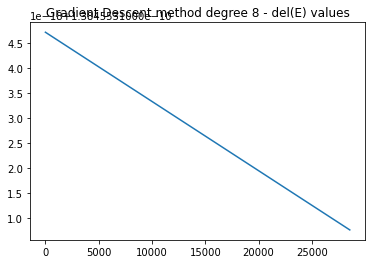

In [41]:
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 8 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [42]:
# training data error for degree 8
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.0407907508345022

In [43]:
# testing data error for degree 8
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8671695427628331

w0=415.36593792966465
w1=6.055450386191478
w2=2.9457491286430986
w3=271.88943710014365
w4=-55.07760983454962
w5=-1.3721005053653137
w6=-386.4904047171893
w7=55.21633703163246
w8=-66.58996033983554
w9=-24.66628591036687
w10=1527.5262368054298
w11=-10.487678789999865
w12=-19.930754807943135
w13=36.29170988130698
w14=-579.6240418802458
w15=394.6032010685382
w16=-303.139655727651
w17=-717.5821726524342
w18=-444.5456385891232
w19=392.12525125909514
w20=-1956.460253172966
w21=-1241.6970934101266
w22=1205.7216309059236
w23=-10967.871587210991
w24=-92.7023196848948
w25=-3991.13505045954
w26=-11077.24086815169
w27=-3275.587889327017
w28=-98027.41549363152
w29=-797.4855696495719
w30=-9396.78180376471
w31=3258.0228513469533
w32=-32054.927375754593
w33=10578.006594317336
w34=4509.181546104155
w35=-23436.980675983123
w36=-19447.071174481724
w37=10559.5816629716
w38=-13976.441498533502
w39=-10229.925571505391
w40=-53890.38183162806
w41=-6656.33430924039
w42=-58795.52652388506
w43=-19473.64598351004


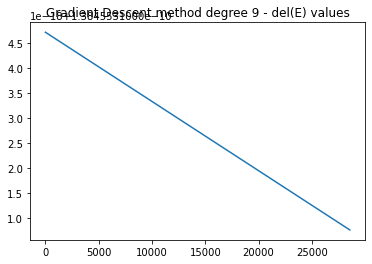

In [44]:
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 9 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 

In [45]:
# training data error for degree 9
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1/np.shape(valX)[0]

1.048405714717473

In [46]:
# testing data error for degree 9
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2
    
testError/np.shape(testXVal)[0]

0.8670581316204531

In [47]:
# stochastic gradient descent after this

w0=1.3831307837696551


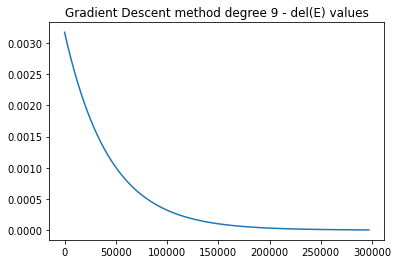

In [48]:
# degree 0
iters = 3000
learningRate = 0.01
degree = 0
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Gradient Descent method degree 9 - del(E) values")
plt.show() # the number of iterations are maxed out in the end, 